# import lib

In [16]:
# data cleaning and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#py lib
from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.dates as mdates


# data processing

### Only using 'local_15min', 'grid', 'solar', 'leg1v', 'leg2v'

In [28]:
initial_data = pd.read_csv('15minute_data_austin.csv')

# only looking at device 661
data661 = initial_data.loc[initial_data['dataid'] == 4031]
#
data661['local_15min'] = data661['local_15min'].str[:-3]
data661['local_15min'] = pd.to_datetime(data661['local_15min'])
data661 = data661.dropna(axis=1, how='all')

data661 = data661[['local_15min', 'grid', 'solar', 'leg1v', 'leg2v']]
data661 = data661.sort_values(by="local_15min")
data661 = data661[data661['solar'].notna()]
data661.head(n=5)

/tmp/ipykernel_29987/627286727.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data661['local_15min'] = data661['local_15min'].str[:-3]
/tmp/ipykernel_29987/627286727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data661['local_15min'] = pd.to_datetime(data661['local_15min'])


,local_15min,grid,solar,leg1v,leg2v
279116,2018-01-01 00:00:00,0.983,-0.002,NaN,NaN
279117,2018-01-01 00:15:00,0.679,-0.002,NaN,NaN
279118,2018-01-01 00:30:00,0.556,-0.002,NaN,NaN
279119,2018-01-01 00:45:00,0.655,-0.002,NaN,NaN
279124,2018-01-01 02:00:00,0.554,-0.002,122.894,123.019


# Plot the data

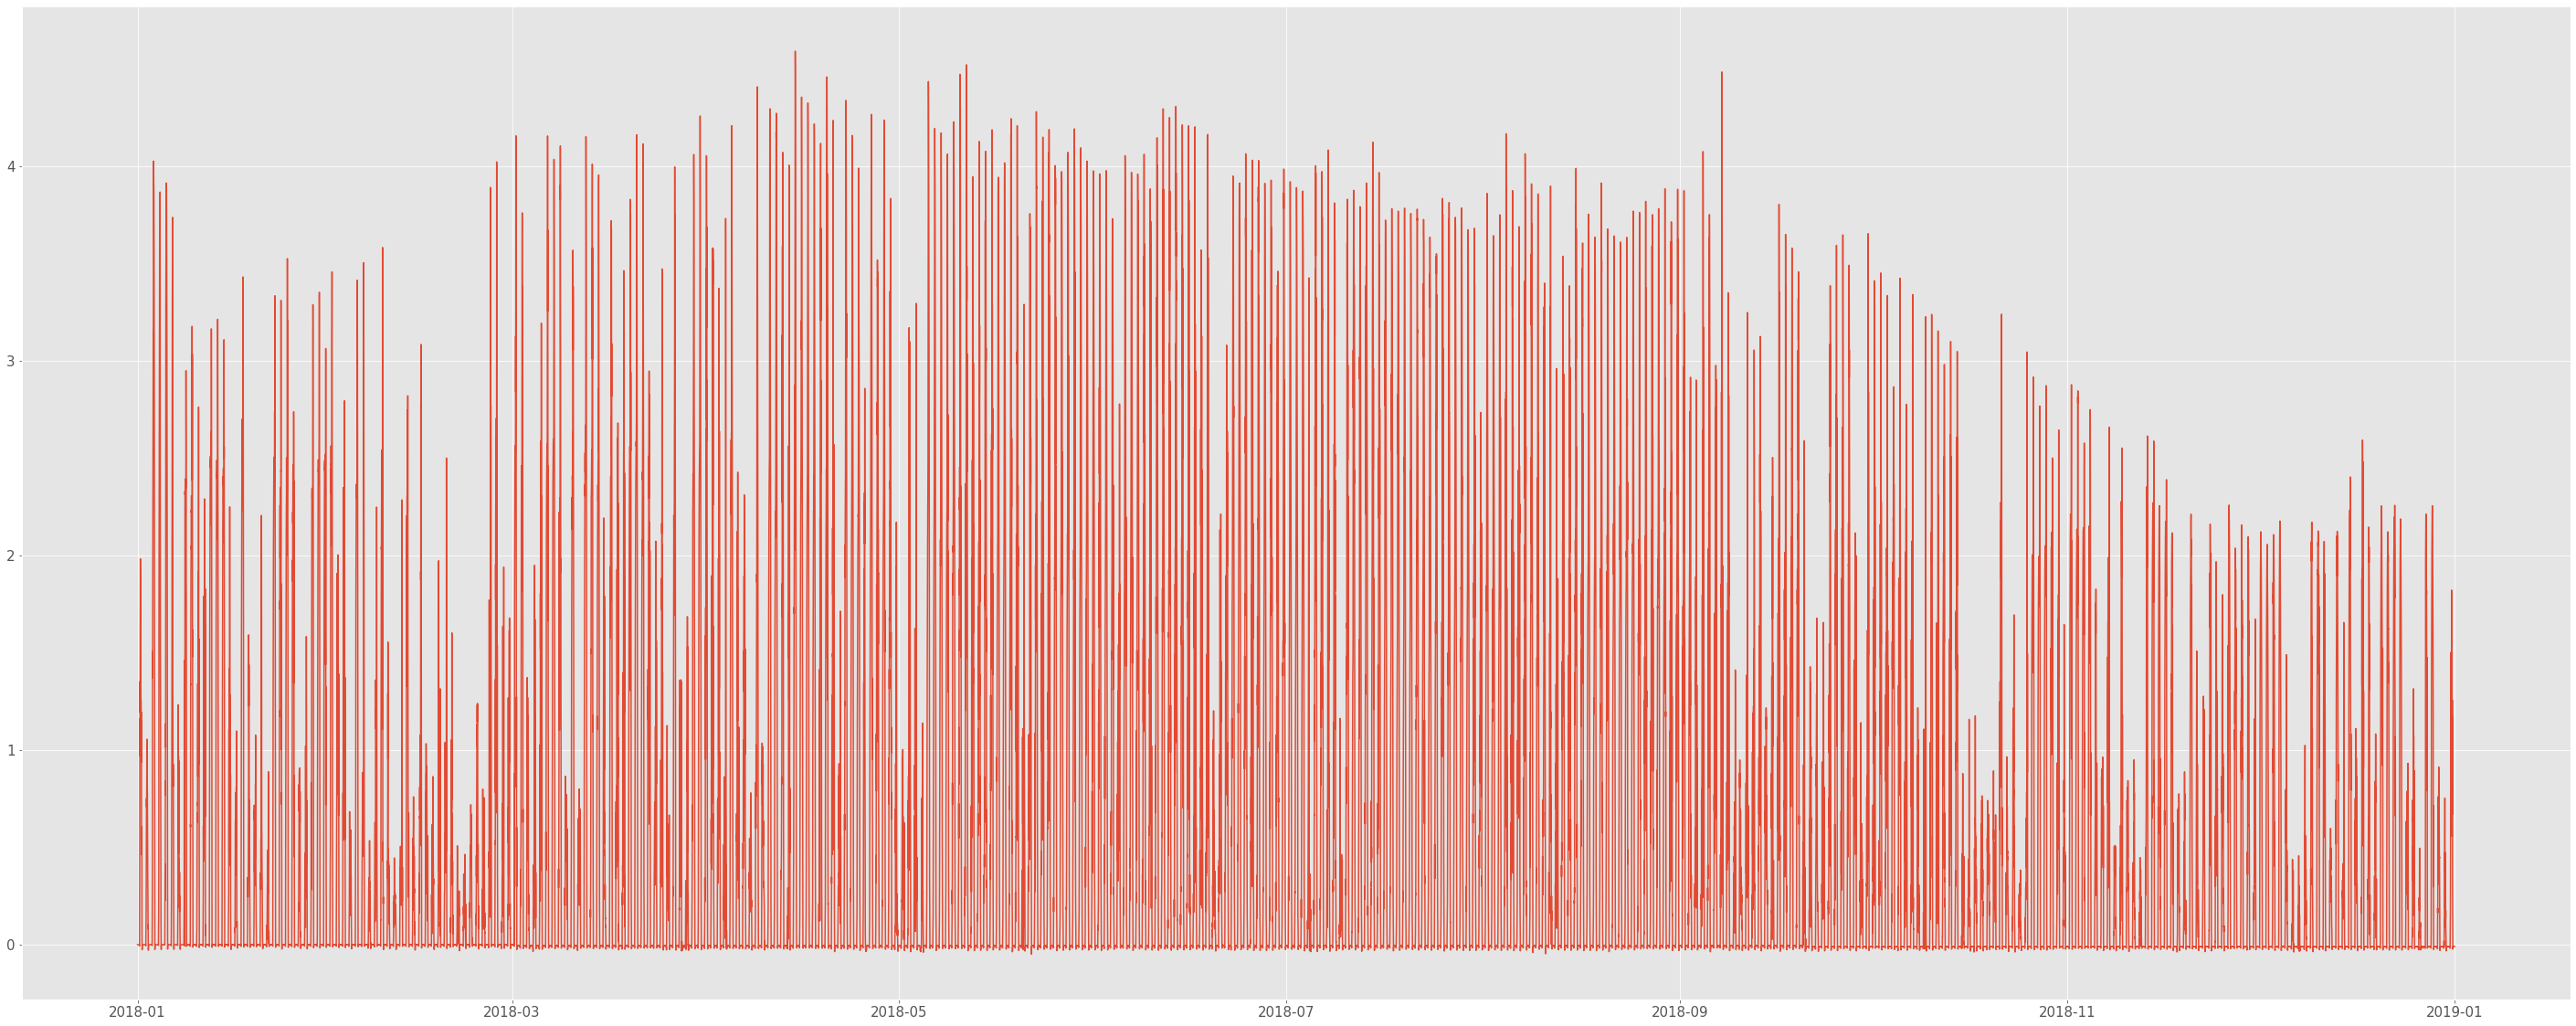

In [29]:
from matplotlib.pyplot import figure

figure(figsize=(50, 20))
xpoints = data661['local_15min']
ypoints = data661['solar']
plt.plot(xpoints, ypoints)
plt.savefig('plot_graph.png')
plt.show()

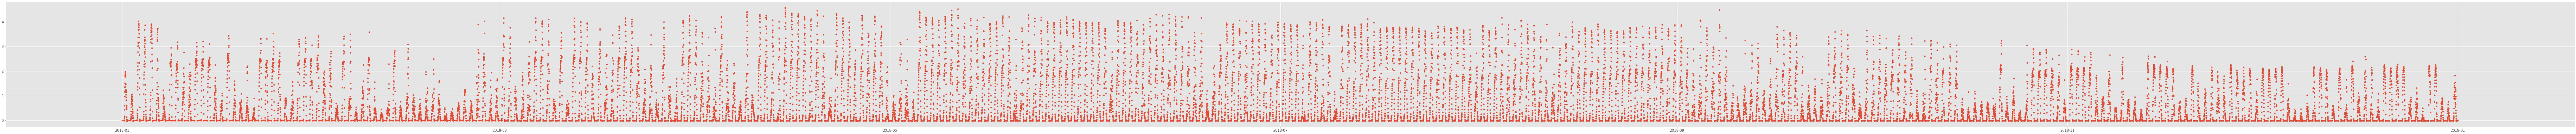

In [30]:

figure(figsize=(200, 10))
plt.scatter(xpoints, ypoints)
plt.savefig('scatter.png')
plt.show()

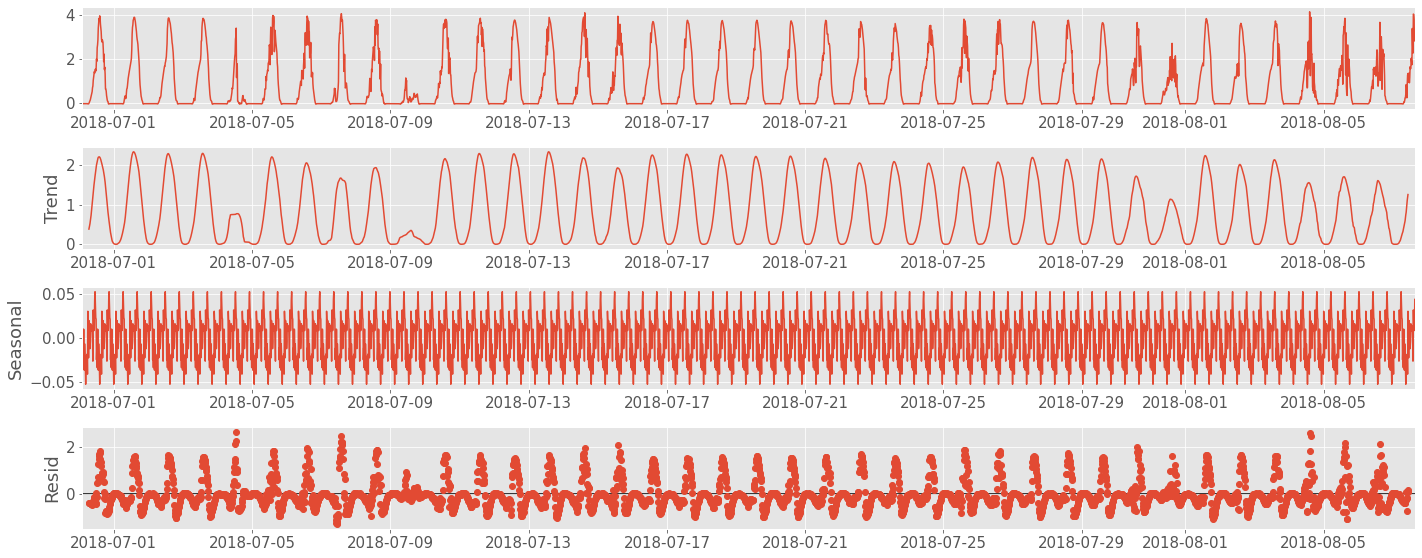

In [31]:

dataseason = data661[['local_15min', 'solar']].copy()
dataseason = dataseason[17280:20982]
#epoch = datetime(1970, 1, 1)
# convert datetime to float
#dataseason['local_15min'] = [(d - epoch).total_seconds() for d in dataseason['local_15min']]
period = max(data661['local_15min']) - min(data661['local_15min'])
dataseason.set_index('local_15min', inplace=True)
plt.rc('figure',figsize=(20,8))
plt.rc('font',size=15)
result = seasonal_decompose(dataseason,model='additive', period = 39)
fig = result.plot()
#result.plot.savefig('seasonal.png')

In [32]:
period

Timedelta('364 days 23:45:00')

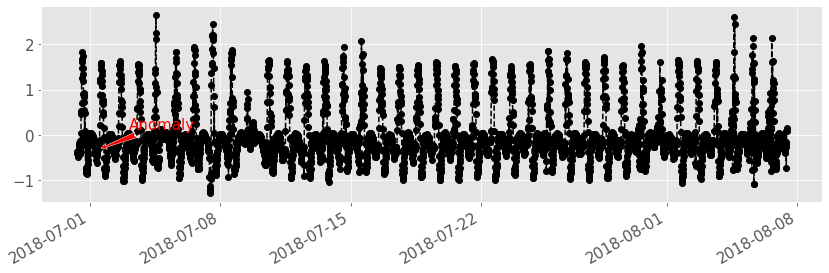

In [33]:
plt.rc('figure',figsize=(14,4))
plt.rc('font',size=15)
fig, ax = plt.subplots()
x = result.resid.index
y = result.resid.values
ax.plot_date(x, y, color='black',linestyle='--')
ax.annotate('Anomaly', (mdates.date2num(x[135]), y[35]), xytext=(30, 20),
          textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))
fig.autofmt_xdate()
plt.show()